# Mini projects

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

**Image sketcher**

In [58]:
def imshow(img):
    plt.figure(figsize=(15,15))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), cmap='gray')

In [59]:
def sketch(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    g_blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(g_blur, 1, 50)
    _, thres_img = cv2.threshold(canny, 70, 255, cv2.THRESH_BINARY_INV)
    return thres_img

In [60]:
img=cv2.imread('img/face.jpg')

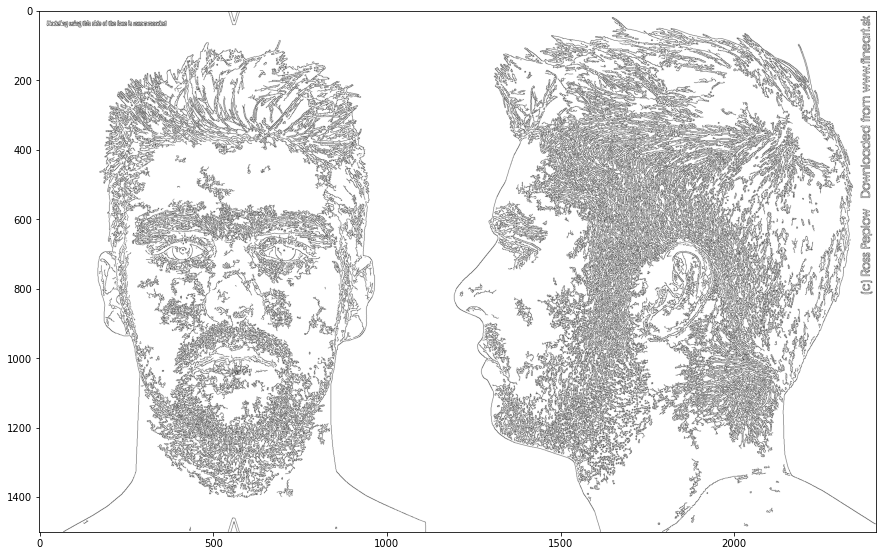

In [61]:
imshow(sketch(img))

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

In [68]:
capture = cv2.VideoCapture(1)

while True:
    _, frame = capture.read()
    cv2.imshow("LIVE SKETCH SHOW",sketch(frame))
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
 
capture.release()
cv2.destroyAllWindows()

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

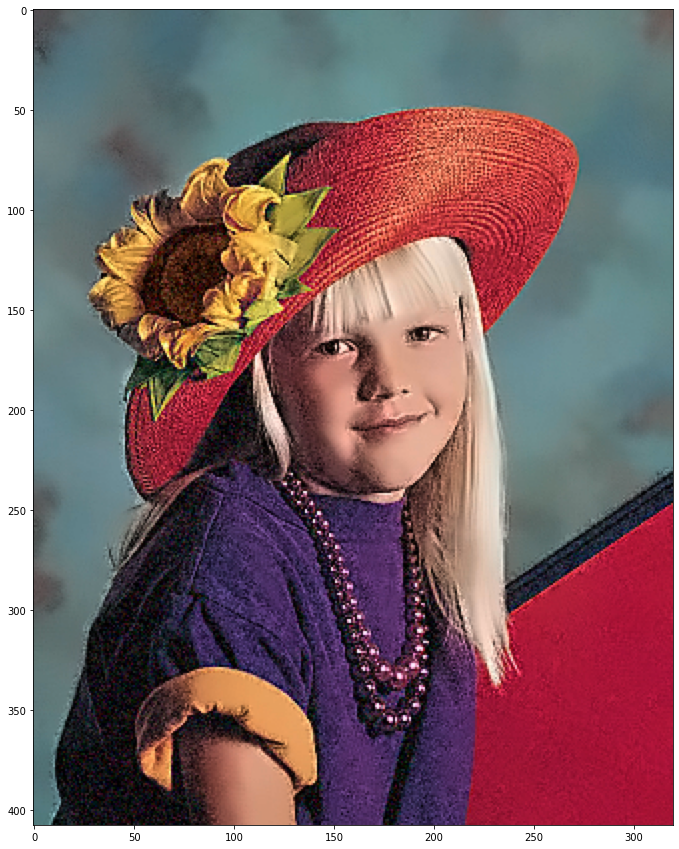

In [47]:
# Denoicing method
img = cv2.imread('img/noisy.png')
denoiced = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21) 
imshow(denoiced)


### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

In [48]:
# 1

In [50]:
img = cv2.imread('img/day3.jpg')

In [64]:
sepia = np.array([[0.272, 0.534, 0.131],
                  [0.349, 0.686, 0.168],
                  [0.393, 0.769, 0.189]])

In [69]:
img_copy = img.copy()
img=np.array(img, dtype=np.float64)
img = cv2.transform(img, sepia)

imshow(img)

error: OpenCV(4.5.2) c:\users\runneradmin\appdata\local\temp\pip-req-build-1hfhc_rd\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x73dc0e5c::Set<3,4,-1>,struct cv::impl::A0x73dc0e5c::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


<Figure size 1080x1080 with 0 Axes>

In [ ]:
img = cv2.imread('messi.jpg')
original = img.copy()
img = np.array(img, dtype = np.float64)
img = cv2.transform(img, np.matrix([[ 0.393, 0.769, 0.189],
                                    [ 0.349, 0.686, 0.168],
                                    [ 0.272, 0.534, 0.131]]))
img[np.where(img>255)] = 255
img = np.array(img, dtype = np.uint8)
cv2.imshow("original", original)
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

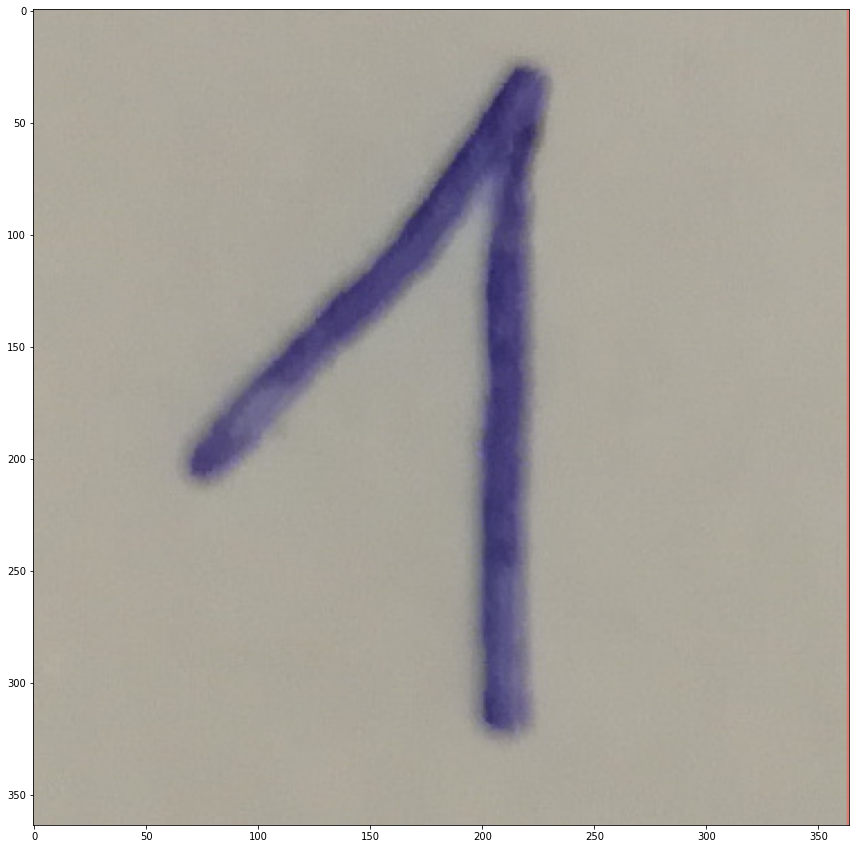

In [67]:
img = cv2.imread('img/1.jpg')
imshow(img)

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits